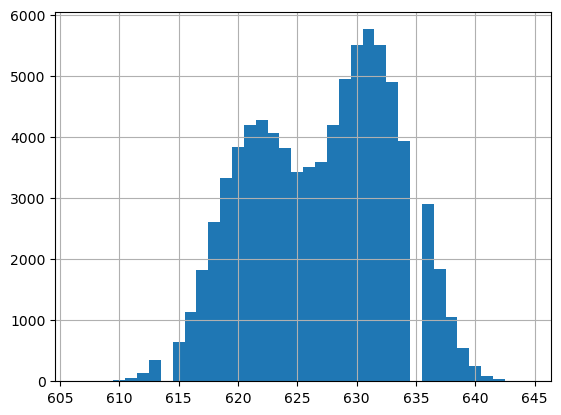

In [1]:
using CSV
using DataFrames
using PyPlot
using Statistics
using StatsBase

data = DataFrame(CSV.File("../data/sensor_data_600.txt"; 
        header=["data", "time", "ir", "lidar"]))

hist(data[:,"lidar"], bins= maximum(data.lidar)-minimum(data.lidar),align="left")
grid("on")

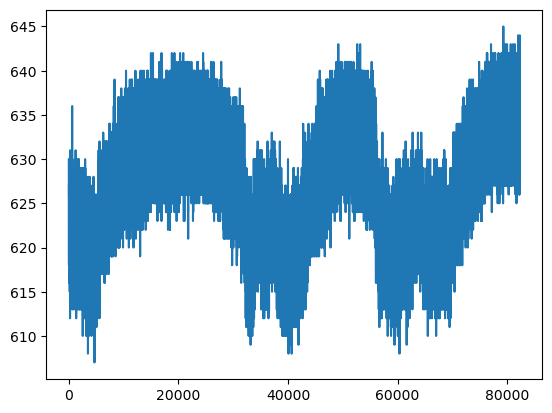

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc0c77df370>

In [2]:
plot(data.lidar)

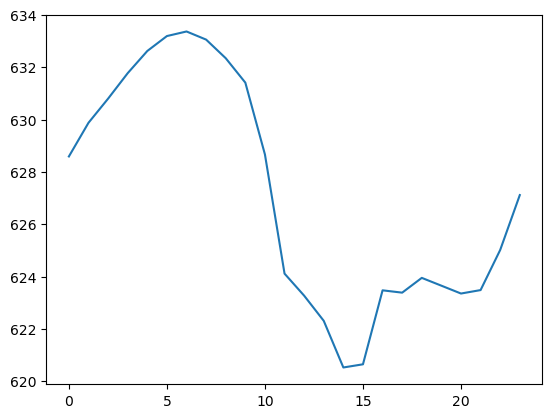

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc0b4263760>

In [3]:
data[:, "hour"] = [div(e, 10000) for e in data.time]
g_data = groupby(data, "hour", sort=true)
d = [mean(x.lidar) for x in g_data]
plot(d)

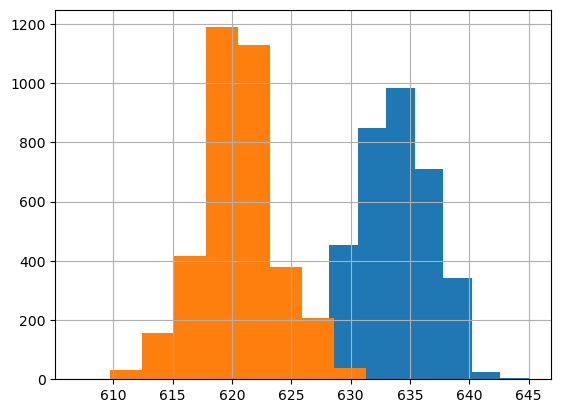

In [4]:
hist(g_data[(hour=6, )].lidar)
hist(g_data[(hour=14, )].lidar)
grid("on")

In [5]:
using FreqTables, NamedArrays
using Plots
@recipe f(pivot::NamedArray{T,2}) where T = names(pivot)..., pivot.array'

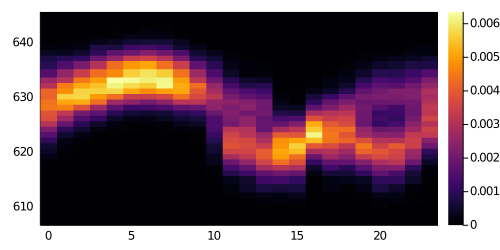

In [6]:
probs = freqtable(data, :hour, :lidar )
probs = NamedArray(convert(Array{Float64,2}, probs), names(probs))
probs ./= length(data.lidar)
gr(fmt=:auto, size=(500, 250))
heatmap(probs)

In [7]:
using Seaborn

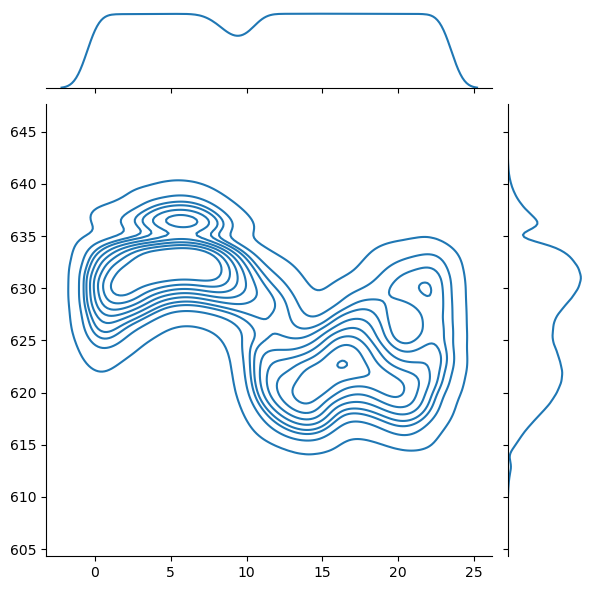

PyObject <seaborn.axisgrid.JointGrid object at 0x7fc0b45f3fa0>

In [8]:
Seaborn.jointplot(x="hour", y="lidar", data.hour, data.lidar,   kind="kde")

In [60]:
p_t

24-element Array{Float64,1}:
 0.04301284310032685
 0.04291563893512837
 0.042879187373178945
 0.04291563893512837
 0.04296424101772761
 0.043037144141626474
 0.04306144518292609
 0.04300069257967705
 0.038711558790294164
 0.028650927692251613
 0.028735981336800283
 0.04309789674487552
 0.04314649882747476
 0.043024993620976656
 0.043182950389424185
 0.04312219778617514
 0.04306144518292609
 0.04312219778617514
 0.04304929466227628
 0.04308574622422571
 0.043158649348124564
 0.042976391538377415
 0.04304929466227628
 0.043037144141626474

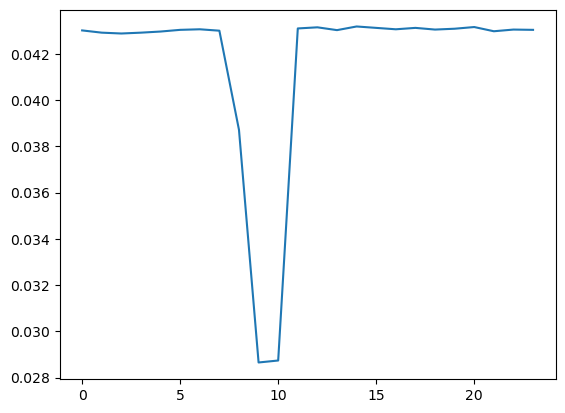

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc0b4673850>

In [9]:
p_t = [sum(probs[i,:]) for i in 1:length(probs[:,1])]
plot(names(probs)[1], p_t)

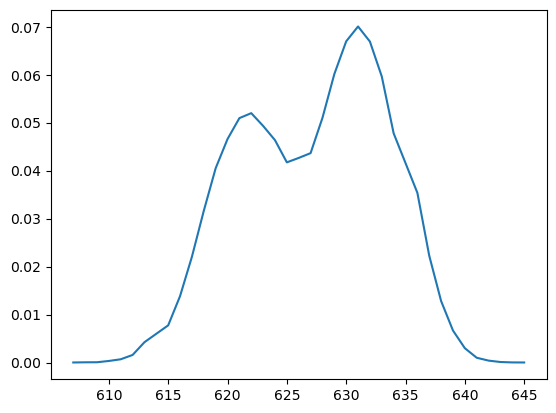

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc0b8653340>

In [10]:
p_z = [sum(probs[:,i])  for i in 1:length(probs[1,:])]
plot(names(probs)[2], p_z)

In [11]:
cond_z_t = probs ./ p_t[1]

24×37 Named Array{Float64,2}
A ╲ B │         607          608  …          644          645
──────┼──────────────────────────────────────────────────────
0     │         0.0          0.0  …          0.0          0.0
1     │         0.0          0.0             0.0          0.0
2     │         0.0          0.0             0.0          0.0
3     │         0.0          0.0             0.0          0.0
4     │         0.0          0.0             0.0          0.0
5     │         0.0          0.0             0.0          0.0
6     │         0.0          0.0             0.0  0.000282486
7     │         0.0          0.0             0.0          0.0
8     │         0.0          0.0     0.000564972          0.0
9     │         0.0          0.0             0.0          0.0
10    │         0.0          0.0             0.0          0.0
11    │         0.0          0.0             0.0          0.0
12    │         0.0          0.0             0.0          0.0
13    │         0.0  0.000282486         

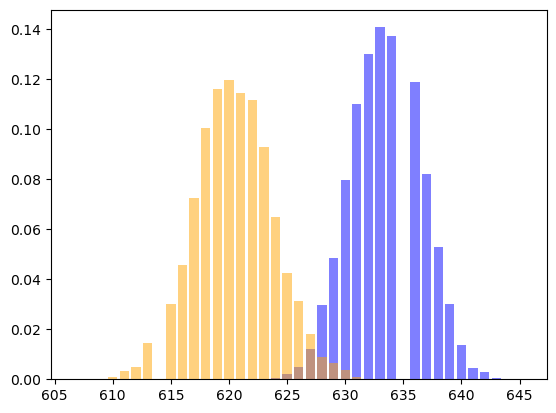

(PyObject <matplotlib.patches.Rectangle object at 0x7fc0b8584a90>, PyObject <matplotlib.patches.Rectangle object at 0x7fc0b86a9fa0>, PyObject <matplotlib.patches.Rectangle object at 0x7fc0b8584ee0>, PyObject <matplotlib.patches.Rectangle object at 0x7fc0b85941f0>, PyObject <matplotlib.patches.Rectangle object at 0x7fc0b85944c0>, PyObject <matplotlib.patches.Rectangle object at 0x7fc0b8594790>, PyObject <matplotlib.patches.Rectangle object at 0x7fc0b8594a60>, PyObject <matplotlib.patches.Rectangle object at 0x7fc0b8594d30>, PyObject <matplotlib.patches.Rectangle object at 0x7fc0b9127040>, PyObject <matplotlib.patches.Rectangle object at 0x7fc0b9127310>, PyObject <matplotlib.patches.Rectangle object at 0x7fc0b91275e0>, PyObject <matplotlib.patches.Rectangle object at 0x7fc0b91278b0>, PyObject <matplotlib.patches.Rectangle object at 0x7fc0b9127b80>, PyObject <matplotlib.patches.Rectangle object at 0x7fc0b9127e50>, PyObject <matplotlib.patches.Rectangle object at 0x7fc0b9139160>, PyObject 

In [12]:
PyPlot.bar(names(cond_z_t)[2], cond_z_t[7,:], color="blue", alpha=0.5)
PyPlot.bar(names(cond_z_t)[2], cond_z_t[15,:], color="orange", alpha=0.5)